# Part 2

# 01. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [2]:
# Assign folder path to a variable

path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 4 Python\05-02-2022 Instacart Basket Analysis'

In [3]:
# Import the most up-to-date project data from Ex 4.9 Part 1. (df_ords_prods_all.pkl)

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','df_ords_prods_all.pkl'))

In [4]:
df.head()

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,High spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,High spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,High spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,High spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,High spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 30)

#### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Create bar chart

<AxesSubplot:>

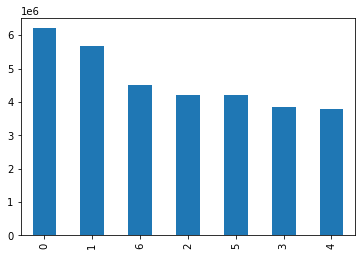

In [6]:
# Create bar chart - for “orders_day_of_the_week” column - preview

df['orders_day_of_week'].value_counts().plot.bar()

In [8]:
# Print frequencies

df['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

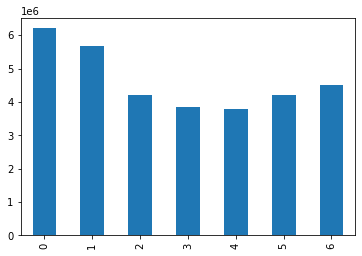

In [7]:
# Create bar chart - for “orders_day_of_the_week” column - sorting by index order - preview

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

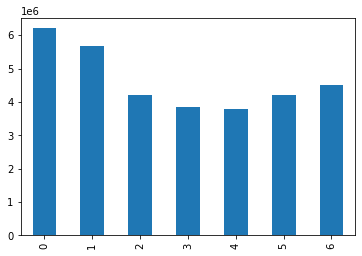

In [63]:
# Saving the visualisation in Jupyter's memory:

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Print frequencies by index order

df['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

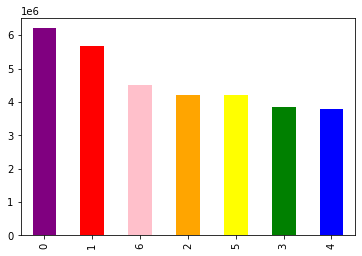

In [12]:
# Include an indexed list of the colors for your bars as an argument in your function

df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

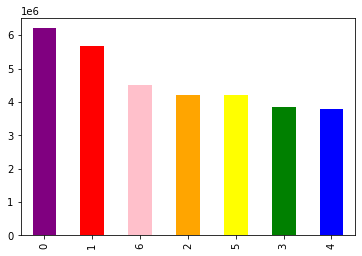

In [13]:
# Saving the visualisation in Jupyter's memory:

bar_color = df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

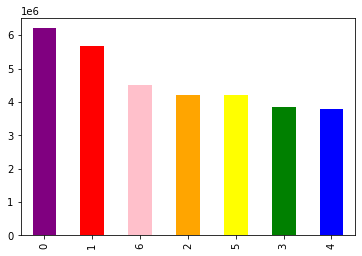

In [14]:
# Calling the above bar chart

bar.figure

#### Create histogram

<AxesSubplot:ylabel='Frequency'>

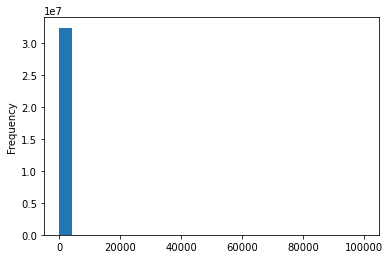

In [15]:
# Create histogram of the 'prices' column

df['prices'].plot.hist(bins = 25)

You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column. The reason for this is to do with data prep stage. Must do data integrity check.

##### Method 1 of data integrity check - descriptive statistics:

In [16]:
# Data integrity check:

df['prices'].describe()

count    3.240486e+07
mean     1.021125e+01
std      4.956361e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Something is odd in the maximum value. To further investigate, you could also conduct a few checks for each specific statistic:

In [17]:
df['prices'].mean()

10.211251258850098

In [18]:
df['prices'].median()

7.400000095367432

In [20]:
df['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. The extreme value is breaking the histogram.

##### Method 2 of data integrity check - create a scatterplot:

<AxesSubplot:xlabel='prices', ylabel='prices'>

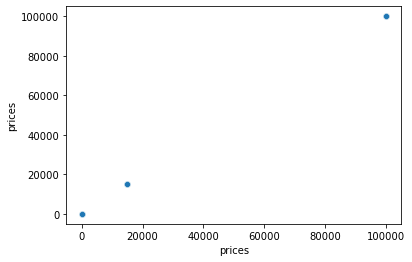

In [21]:
# Use scatterplots to investigate the relationship between two variables.
# Plotting the 'prices' column against itself. This will reveal whether there are any outliers.

sns.scatterplot(x = 'prices', y = 'prices', data = df)

There are two data points far beyond values expected close to 20,000 and 100,000. This close-to-100,000 value corresponds to the max value identified in the previous checks. 

To investigate close to 20,000 value, run a few more exploratory checks on the data.

Check any values above a certain threshold in your data. Take $100 as the maximum normal price people will pay in a supermarket.

In [24]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,High spender,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,High spender,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,High spender,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,...,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,...,High spender,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,False,33664,14,0,...,High spender,23.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,False,33664,4,0,...,High spender,6.0,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880


In [25]:
# Command tells pandas not to assign any options regarding the maximum number of columns to display. 

pd.options.display.max_columns = None

In [26]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,47,Loyal customer,10.382812,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Slowest days,Most orders,47,Loyal customer,10.382812,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Most orders,48,Loyal customer,10.382812,High spender,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Most orders,29,Regular customer,12.492188,High spender,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,18,Regular customer,12.492188,High spender,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Busiest days,Most orders,5,New customer,13.296875,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Slowest days,Most orders,13,Regular customer,12.492188,High spender,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,False,33664,14,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Most orders,7,New customer,13.296875,High spender,23.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,False,33664,4,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Slowest days,Most orders,4,New customer,13.296875,High spender,6.0,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100). 

In the prices column, there's another odd odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. 

Following this is the  $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

In [27]:
# For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. 
# Therefore turn them into NaNs.

df.loc[df['prices'] >100, 'prices'] = np.nan

In [28]:
# Check whether the replacement was successful by running a max-value check on your “prices” column.

df['prices'].max()

25.0

###### Note: Data Quality Reminder

Keep in mind that this step should have been completed during the data prep stages of your project. It isn’t generally a good idea to still be cleaning your data in the visualization stage. 

To keep your data cleaning tasks in one place, we recommend you copy the code from above into your notebook from Exercise 4.5. 

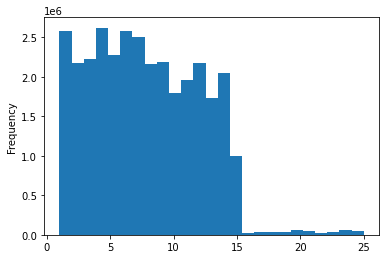

In [29]:
# Creating histogram of 'prices' column with 25 number of bins

hist = df['prices'].plot.hist(bins = 25)

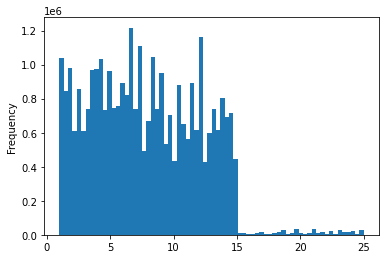

In [31]:
# Creating histogram of 'prices' column with 70 number of bins

hist_2 = df['prices'].plot.hist(bins = 70)

#### Create scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

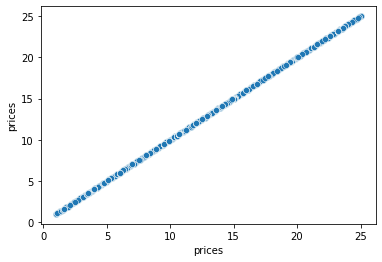

In [33]:
# Create scatterplot of 'prices' column

sns.scatterplot(x = 'prices', y = 'prices', data = df)

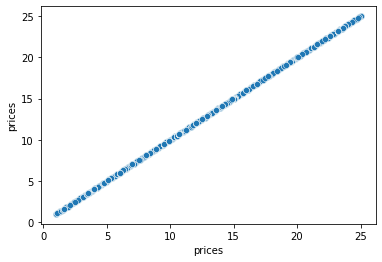

In [34]:
# Create scatterplot of 'prices' column and saving the visualisation in Jupyter's memory:

scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df)

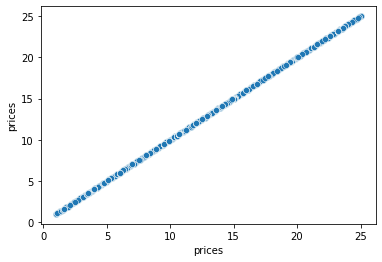

In [35]:
# Calling the above bar chart

scatter.figure

In [36]:
# Exporting histogram

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot.png'))

#### Create linechart using a sample subset

In [37]:
# Setting a random but reproducible pattern.
# Set the seed for the random number generator.

np.random.seed(4)

In [38]:
# Creating a new list, dev, to split dataframe into 70/30 split samples.

dev = np.random.rand(len(df)) <= 0.7

In [39]:
dev

array([False,  True, False, ..., False,  True, False])

In [40]:
np.random.rand(10)

array([0.55006859, 0.84913335, 0.64899461, 0.01577571, 0.76204088,
       0.38773303, 0.73423656, 0.20564689, 0.04226066, 0.85816197])

In [41]:
df.shape

(32404859, 30)

Now there is a list of 32,404,859 boolean values and dataframe that is 32,404,859 rows long.

In [42]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [43]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [44]:
big.shape

(22687325, 30)

In [45]:
small.shape

(9717534, 30)

In [46]:
# Check length of dataframe

len(df)

32404859

In [47]:
# Check the sum of big and small is equivalent to the length of dataframe

len(big) + len(small)

32404859

The subsetting procedure was successful as the numbers match.

In [48]:
# To speed up the processing time, reduce samples to only those columns necessary for the chart ('orders_day_of_week','prices' columns)

df_2 = small[['orders_day_of_week','prices']]

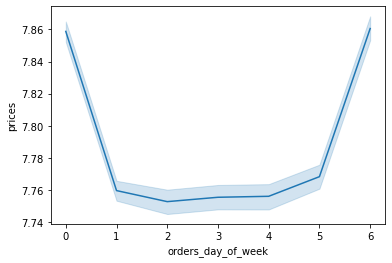

In [49]:
# Creating line chart using small sampling data

line_2 = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [50]:
df.shape

(32404859, 30)

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

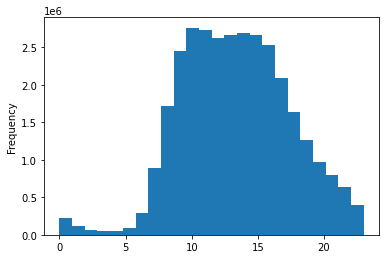

In [54]:
hist_3 = df['order_hour_of_day'].plot.hist(bins=24)

The histogram demonstrates majority of the orders are made between 9am and 4pm.

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

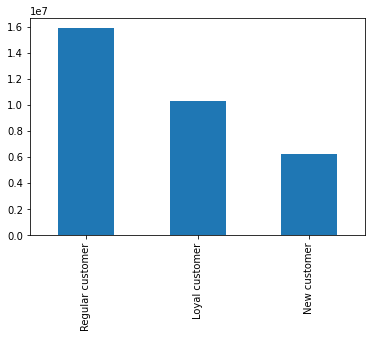

In [55]:
bar_2  = df ['loyalty_flag'].value_counts().plot.bar()

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [58]:
df_3 = df[['order_hour_of_day', 'prices']]

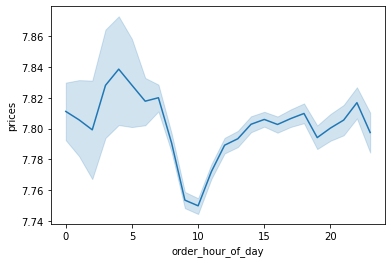

In [60]:
line_3 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

Expenditure peaks at 4am, but is at the lowest at 10am. Unsure why this is the case, could be in a different timezone.

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [61]:
# To speed up the processing time, reduce samples to contain only 'fam_status','age' columns.

df_4 = df[['fam_status','age']]

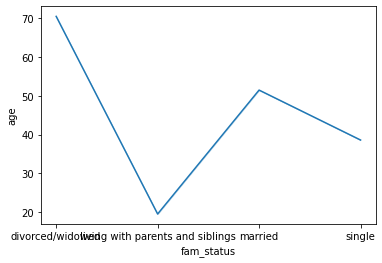

In [62]:
# Correlation between age and fam_status

line_4 = sns.lineplot(data = df_4, x = 'fam_status', y = 'age')

The line chart shows the correlation between shoppers age and family status. We can see divorced/widowed shoppers are approximately 70 years of age, while living with parents and siblings are the youngest shoppers of around 20 years of age. This result is true to reality of age in family statuses.

In [64]:
# To speed up the processing time, reduce samples to contain only 'age','n_dependants' columns.

df_5 = df[['n_dependants','age']]

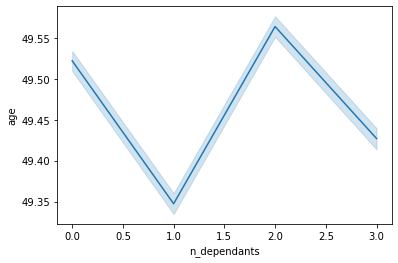

In [73]:
# Correlation between age and n_dependants

line_5 = sns.lineplot(x = 'n_dependants', y = 'age', data = df_5)

#### Question for Victor

The y axis looks wrong, it is showing the age of 49 only, but when I check the dataframe, it is showing other ages as well.

In [75]:
df_5.head(50)

,n_dependants,age
0,3,31
1,3,31
2,3,31
3,3,31
4,3,31
5,3,31
6,3,31
7,3,31
8,3,31
9,3,31


This does not make too much sense. The age axis does not look accurate.
Best thing to do is to check values in 'n_dependants' column and its corresponding age.

Note: A dependant is a person who is substantially financially dependent. E.g. children, parents.



#### 7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows. 

In [66]:
# To speed up the processing time, reduce samples to contain only 'age','income' columns.

df_6 = df[['age','income']]

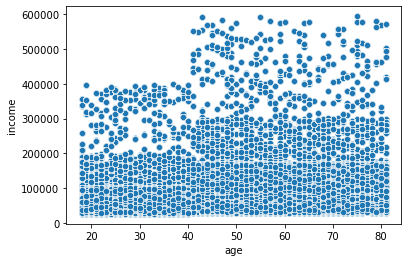

In [67]:
# Correlation between age and income

scatter_2 = sns.scatterplot(data = df_6, x = 'age', y = 'income')

#### 8. Export your visualizations as “.png” files in your relevant project folder.

In [68]:
# Exporting bar chart of orders_day_of_week from Q2

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_day_of_week.png'))

In [69]:
# Exporting histogram of 'prices' column with 70 number of bins from Q2

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_prices.png'))

In [ ]:
# Export scatterplot of 'prices' column from Q2 (prices vs prices) 

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatter_prices.png'))

In [ ]:
# Export line chart of prices vs orders_day_of_week using small sampling data

line_2 = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [ ]:
# Export histogram of the “order_hour_of_day” column from Q3

hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_order_hour_of_day.png'))

In [ ]:
# Export bar chart from the “loyalty_flag” column from Q4

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_flag.png'))

In [ ]:
# Export line chart of prices vs order_hour_of_day from Q5

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_prices_order_hour.png'))

In [ ]:
# Export line chart of age vs fam_status Q6

line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_fam_status.png'))

In [ ]:
# Export line charge of age vs n_dependants Q6

line_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_ndepdenants.png'))

In [ ]:
# Export scatterplot of income vs age from Q7

scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatter_income_age.png'))